# Problema a ser analisado:

Um grande banco tem o objetivo de desenvolver um modelo para identificar maior probabilidade de default. Sua tarefa será realizar uma análise descritiva e tratamento dos dados para entender o perfil dos clientes e quais fatores podem influenciar no risco de crédito.

In [2]:
#importando bibliotecas necessárias para a analise
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

In [3]:
#lendo o dataframe
df = pd.read_csv("risco_credito.csv")
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


In [4]:
df.tail()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
64587,False,0.33,7230.74,36.0,NaN,57012.14,libr,m,True,0.0
64588,False,0.20,9764.01,36.0,15478.0,76032.77,leo,m,False,0.0
64589,False,0.53,35022.28,60.0,18658.0,100028.45,NaN,f,False,0.0
64590,False,0.43,20015.96,36.0,NaN,109561.85,arie,m,False,0.0
64591,False,0.35,16327.45,36.0,11904.0,41023.92,NaN,m,True,0.0


In [ ]:
#eliminando colunas desnecessárias para a analise
df = df.drop(columns=['signo', 'perfil_facebook'])
df.head(10)

In [6]:
#criando funcao para ter informacoes sobre os dados
def show_info(data) :
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  

In [7]:
show_info(df)

DATASET SHAPE:  (64592, 8) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   genero                      57406 non-null  object 
 7   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.9+ MB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

default                           2
t_risco                          82
v

### ANALISE DESCRITÍVA

In [8]:
df.columns

Index(['default', 't_risco', 'valor_emprestimo', 'prazo_pagamento',
       'limite_credito', 'renda', 'genero', 'n_emprestimos_inadiplentes'],
      dtype='object')

In [9]:
df.head(10)

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,f,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,m,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,m,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,0.0
5,False,0.22,8007.11,36.0,NaN,43008.57,f,0.0
6,False,0.42,10072.16,36.0,0.0,39335.52,m,0.0
7,False,0.42,16016.97,60.0,102018.0,98772.00,m,0.0
8,False,0.36,11517.24,60.0,0.0,62014.40,f,0.0
9,False,0.24,11539.08,36.0,82310.0,85022.96,f,0.0


In [10]:
numerical = ['t_risco','valor_emprestimo','prazo_pagamento','limite_credito', 'n_emprestimos_inadiplentes']

In [11]:
#vamos obter as propriedades estatisticas de cada coluna
df[numerical].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
t_risco,63807.0,0.30,0.10,0.00,0.22,0.29,0.36,0.9
valor_emprestimo,63807.0,13853.28,8105.66,527.07,7762.94,12023.68,19384.82,35059.6
prazo_pagamento,63807.0,41.84,10.30,36.00,36.00,36.00,36.00,60.0
limite_credito,44839.0,34562.01,37041.87,0.00,10000.00,25775.00,47326.50,613117.0
n_emprestimos_inadiplentes,63789.0,0.00,0.08,0.00,0.00,0.00,0.00,5.0


In [12]:
#calculo mediana
mediana_t_risco = sts.median(df['t_risco'])
mediana_valor_emprestimo = sts.median(df['valor_emprestimo'])
mediana_prazo_pagamento = sts.median(df['prazo_pagamento'])
mediana_limite_credito = sts.median(df['limite_credito'])
mediana_n_emprestimos_inadiplentes = sts.median(df['n_emprestimos_inadiplentes'])

print('mediana_t_risco: \n',round(mediana_t_risco,2))
print('mediana_valor_emprestimo: \n',round(mediana_valor_emprestimo,2))
print('mediana_prazo_pagamento: \n',round(mediana_prazo_pagamento,2))
print('mediana_limite_credito: \n',round(mediana_limite_credito,2))
print('mediana_n_emprestimos_inadiplentes: \n',round(mediana_n_emprestimos_inadiplentes,2))

mediana_t_risco: 
 0.55
mediana_valor_emprestimo: 
 11066.56
mediana_prazo_pagamento: 
 60.0
mediana_limite_credito: 
 nan
mediana_n_emprestimos_inadiplentes: 
 0.0


In [13]:
np.std(df['t_risco'])

0.10154776338758102

In [14]:
df['t_risco'].describe().round(2).T

count    63807.00
mean         0.30
std          0.10
min          0.00
25%          0.22
50%          0.29
75%          0.36
max          0.90
Name: t_risco, dtype: float64

In [15]:
#calculando o Coeficiente de Variação
CV_t_risco = np.std(df['t_risco'])/np.mean(df['t_risco'])
CV_valor_emprestimo = np.std(df['valor_emprestimo'])/np.mean(df['valor_emprestimo'])
CV_prazo_pagamento = np.std(df['prazo_pagamento'])/np.mean(df['prazo_pagamento'])
CV_limite_credito = np.std(df['limite_credito'])/np.mean(df['limite_credito'])
CV_n_emprestimos_inadiplentes = np.std(df['n_emprestimos_inadiplentes'])/np.mean(df['n_emprestimos_inadiplentes'])

print('CV_t_risco: \n',round(CV_t_risco,2))
print('CV_valor_emprestimo: \n',round(CV_valor_emprestimo,2))
print('CV_prazo_pagamento: \n',round(CV_prazo_pagamento,2))
print('CV_limite_credito: \n',round(CV_limite_credito,2))
print('CV_n_emprestimos_inadiplentes: \n',round(CV_n_emprestimos_inadiplentes,2))

CV_t_risco: 
 0.34
CV_valor_emprestimo: 
 0.59
CV_prazo_pagamento: 
 0.25
CV_limite_credito: 
 1.07
CV_n_emprestimos_inadiplentes: 
 16.81


observamos que:

CV_t_risco: 0.34

CV_valor_emprestimo: 0.59

CV_prazo_pagamento: 0.25

CV_limite_credito: 1.07

CV_n_emprestimos_inadiplentes: 16.81
 
logo, 't_risco', 'valor_emprestimo', 'limite_credito' e 'n_emprestimos_inadiplentes' possuem alta dispersão, logo não vamos usar a média para substituir os valores NaN. Vamos usar a mediana.   Para prazo_pagamento vamos usar a média.

In [17]:
#preenche onde esta NaN pela mediana ou media.
df['t_risco'].fillna(np.median(df['t_risco']), inplace=True)
df['valor_emprestimo'].fillna(np.median(df['valor_emprestimo']), inplace=True)
df['limite_credito'].fillna(sts.mode(df['limite_credito']), inplace=True)
df['n_emprestimos_inadiplentes'].fillna(np.median(df['n_emprestimos_inadiplentes']), inplace=True)
df['prazo_pagamento'].fillna(np.mean(df['prazo_pagamento']), inplace=True)

In [18]:
df.head(10)

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,0.0
1,False,0.23,10046.51,36.0,0.0,46016.31,f,0.0
2,False,0.30,21228.25,60.0,0.0,48025.47,m,0.0
3,False,0.15,23032.33,36.0,0.0,46011.12,m,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,0.0
5,False,0.22,8007.11,36.0,0.0,43008.57,f,0.0
6,False,0.42,10072.16,36.0,0.0,39335.52,m,0.0
7,False,0.42,16016.97,60.0,102018.0,98772.00,m,0.0
8,False,0.36,11517.24,60.0,0.0,62014.40,f,0.0
9,False,0.24,11539.08,36.0,82310.0,85022.96,f,0.0


## Informações sobre a base de dados

- 67,75% dos clientes são homens
- 32,25% dos clientes são mulheres

- 74,8% dos clientes possuem 36 meses para pagar o emprestimo
- 24,0% dos clientes possuem 60 meses para pagar o emprestimo
- 1,2% dos clientes possuem 41 meses para pagar o emprestimo

Vamos agora visualizar graficamente as informações

In [19]:
df['genero'].value_counts(normalize=True)

m    0.677525
f    0.322475
Name: genero, dtype: float64

In [30]:
df['prazo_pagamento'].value_counts(normalize=True)

36.000000    0.747662
60.000000    0.240185
41.835347    0.012153
Name: prazo_pagamento, dtype: float64

In [20]:
df['n_emprestimos_inadiplentes'].value_counts(normalize=True)

0.0    0.995924
1.0    0.003559
2.0    0.000439
3.0    0.000063
5.0    0.000016
Name: n_emprestimos_inadiplentes, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'genero')

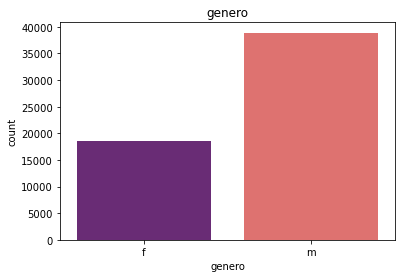

In [21]:
sns.countplot(df['genero'], palette='magma').set_title('genero')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'prazo_pagamento')

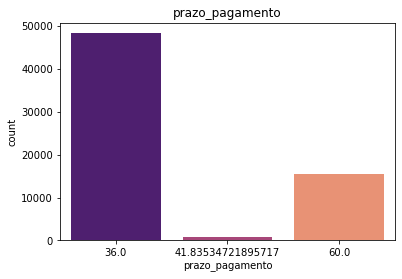

In [23]:
sns.countplot(df['prazo_pagamento'], palette='magma').set_title('prazo_pagamento')

In [ ]:
sns.countplot(df['renda'], color='pink').set_title('renda')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'renda')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 't_risco')

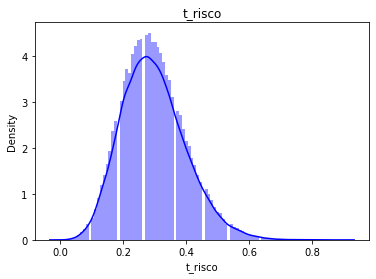

In [35]:
#avaliando que tipo de distribuicao nos temos para t_risco
sns.distplot(df['t_risco'], bins=100, rug=False, color='blue').set_title('t_risco')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 't_risco')

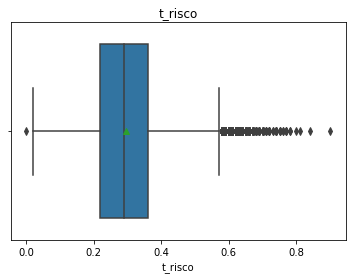

In [37]:
#boxplot para t_risco
sns.boxplot(df['t_risco'], showmeans=True).set_title('t_risco')

### Análise Bivariada
Vamos agora observar as relações entre as variáveis.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='t_risco', ylabel='count'>

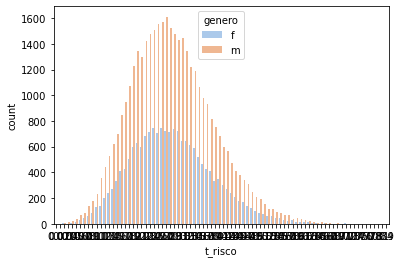

In [43]:
sns.countplot(df['t_risco'], hue=df.genero, palette='pastel')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='t_risco', ylabel='count'>

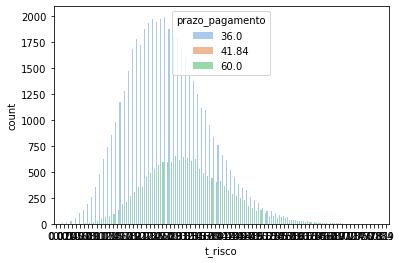

In [50]:
sns.countplot(df['t_risco'].round(2), hue=df['prazo_pagamento'].round(2), palette='pastel')

<AxesSubplot:xlabel='genero', ylabel='t_risco'>

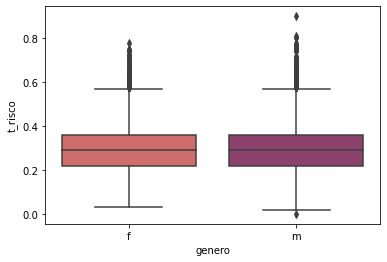

In [51]:
sns.boxplot(data=df, x="genero", y="t_risco",palette='flare')